In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('train (1).csv')

In [4]:
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
data = data.drop(['id'],axis = 1)

# Feature Engineering 

In [6]:
# Define bins and labels for categorizing age groups
age_bins = [0, 12, 19, 35, 60, 100]  # Age range from 0 to 100
age_labels = ['Child', 'Teen', 'Young Adult', 'Middle-Aged Adult', 'Senior']
 
# Convert the 'Age' column to categorical using the bins and labels
data['Age'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

In [7]:
data['Age']

0        Young Adult
1               Teen
2               Teen
3        Young Adult
4        Young Adult
            ...     
20753    Young Adult
20754           Teen
20755    Young Adult
20756    Young Adult
20757    Young Adult
Name: Age, Length: 20758, dtype: category
Categories (5, object): ['Child' < 'Teen' < 'Young Adult' < 'Middle-Aged Adult' < 'Senior']

In [8]:
data.dtypes

Gender                              object
Age                               category
Height                             float64
Weight                             float64
family_history_with_overweight      object
FAVC                                object
FCVC                               float64
NCP                                float64
CAEC                                object
SMOKE                               object
CH2O                               float64
SCC                                 object
FAF                                float64
TUE                                float64
CALC                                object
MTRANS                              object
NObeyesdad                          object
dtype: object

In [9]:
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

In [10]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Male,Young Adult,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,Female,Teen,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,Female,Teen,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,Female,Young Adult,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,Male,Young Adult,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151


# Robust Scaler 

In [11]:
from sklearn.preprocessing import RobustScaler
# Fit the scaler on the training data and transform both training and testing data

 
numerical_features=['Height','Weight','FCVC','NCP','CH2O','FAF','TUE','BMI']
# Initialize the RobustScaler
scaler = RobustScaler()

data1 = data[numerical_features].apply(pd.to_numeric, errors='coerce')



# Encode categorical to Numerical

In [12]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb

LabelEncoder()

In [13]:
data1['Gender'] = lb.fit_transform(data['Gender'])
data1['Age'] = lb.fit_transform(data['Age'])
data1['family_history_with_overweight'] = lb.fit_transform(data['family_history_with_overweight'])
data1['FAVC'] = lb.fit_transform(data['FAVC'])
data1['CAEC'] = lb.fit_transform(data['CAEC'])
data1['SMOKE'] = lb.fit_transform(data['SMOKE'])
data1['SCC'] = lb.fit_transform(data['SCC'])
data1['CALC'] = lb.fit_transform(data['CALC'])
data1['MTRANS'] = lb.fit_transform(data['MTRANS'])
data1['NObeyesdad'] = lb.fit_transform(data['NObeyesdad'])

In [14]:
data1.head()

,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender,Age,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,28.259565,1,3,1,1,2,0,0,1,3,6
1,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,23.422091,0,2,1,1,1,0,0,2,0,1
2,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,17.126706,0,2,1,1,2,0,0,2,3,0
3,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,44.855798,0,3,1,1,2,0,0,1,3,4
4,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,25.599151,1,3,1,1,2,0,0,1,3,6


In [15]:
data1.head()

,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender,Age,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,28.259565,1,3,1,1,2,0,0,1,3,6
1,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,23.422091,0,2,1,1,1,0,0,2,0,1
2,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,17.126706,0,2,1,1,2,0,0,2,3,0
3,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,44.855798,0,3,1,1,2,0,0,1,3,4
4,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,25.599151,1,3,1,1,2,0,0,1,3,6


# Model Creation 

In [16]:
# Features and target
X = data1.drop(['NObeyesdad'], axis=1)  # Assuming BMI is not a feature for classification
y = data1['NObeyesdad']


In [17]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [18]:
X_train.head()

,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender,Age,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
9958,1.770000,97.000000,3.0,3.000000,2.000000,3.000000,1.0,30.961729,1,2,1,1,0,0,0,2,0
7841,1.753389,54.877111,2.0,4.000000,2.000000,2.000000,1.0,17.849855,1,3,1,1,2,0,0,2,3
9293,1.819867,122.024954,3.0,2.880817,1.645338,0.739881,0.0,36.844219,1,3,1,1,2,0,0,1,3
15209,1.580000,80.000000,2.0,3.000000,1.000000,0.000000,0.0,32.046146,0,0,1,1,2,0,0,1,0
16515,1.800000,95.000000,3.0,3.000000,3.000000,2.000000,1.0,29.320988,1,3,1,0,2,0,0,0,3


# Random Forest 

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:
y_pred = rf_classifier.predict(X_train)
y_pred

array([2, 0, 3, ..., 5, 4, 2])

In [21]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (16606, 17)
y_train shape: (16606,)


In [22]:
 #Evaluation Metrics for Classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy = accuracy_score(y_train, y_pred)
conf_matrix = confusion_matrix(y_train, y_pred)
class_report = classification_report(y_train, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9993978080211972
Confusion Matrix:
 [[1998    1    0    0    0    0    0]
 [   1 2453    0    0    0    2    0]
 [   0    0 2366    0    0    0    1]
 [   0    0    0 2591    0    0    0]
 [   0    0    0    0 3242    0    0]
 [   0    1    0    0    0 1940    2]
 [   0    0    1    0    0    1 2006]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       1.00      1.00      1.00      2456
           2       1.00      1.00      1.00      2367
           3       1.00      1.00      1.00      2591
           4       1.00      1.00      1.00      3242
           5       1.00      1.00      1.00      1943
           6       1.00      1.00      1.00      2008

    accuracy                           1.00     16606
   macro avg       1.00      1.00      1.00     16606
weighted avg       1.00      1.00      1.00     16606



In [23]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)


y_test shape: (4152,)
y_pred shape: (16606,)


In [24]:
y_pred = rf_classifier.predict(X_test)
y_pred

array([4, 5, 2, ..., 2, 5, 6])

In [25]:
#Evaluation Metrics for Classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8990847784200385
Confusion Matrix:
 [[488  33   0   0   0   2   1]
 [ 24 556   0   0   0  43   3]
 [  2   1 476  13   1  16  34]
 [  0   0  23 631   2   0   1]
 [  0   0   1   1 802   0   0]
 [  1  41   8   0   0 369  65]
 [  0   9  41   2   0  51 411]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       524
           1       0.87      0.89      0.88       626
           2       0.87      0.88      0.87       543
           3       0.98      0.96      0.97       657
           4       1.00      1.00      1.00       804
           5       0.77      0.76      0.76       484
           6       0.80      0.80      0.80       514

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



In [37]:
# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame to view feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df.columns)


Index(['Feature', 'Importance'], dtype='object')


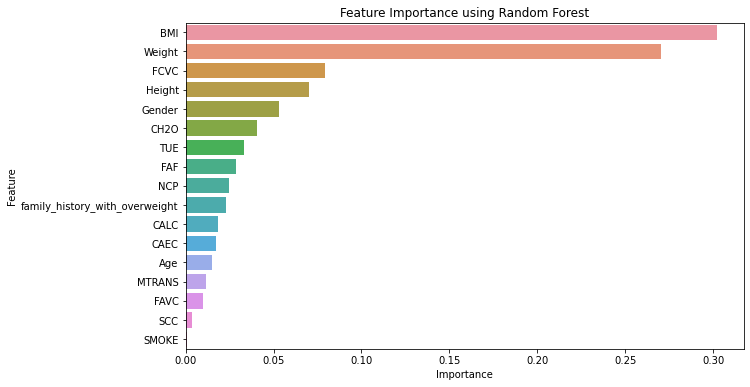

In [28]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance using Random Forest')
plt.show()

In [57]:
# Set a threshold for feature importance
threshold = 0.010# Adjust this value as needed

# Select features that meet or exceed the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].values

# Check the selected features
print("Selected Features:", selected_features)

# Filter the original dataset to keep only the selected features
X_selected = X[selected_features]


Selected Features: ['BMI' 'Weight' 'FCVC' 'Height' 'Gender' 'CH2O' 'TUE' 'FAF' 'NCP'
 'family_history_with_overweight' 'CALC' 'CAEC' 'Age' 'MTRANS']


In [58]:
# Filter the training and testing datasets to keep only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [59]:
# Train a new Random Forest model with only the selected features
model_selected = RandomForestClassifier(random_state=42)
model_selected.fit(X_train_selected, y_train)  # Train on scaled training data

# Evaluate the model
y_pred = model_selected.predict(X_test_selected) # Use the correct test set for prediction
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8947495183044316
Confusion Matrix:
 [[488  33   0   0   0   2   1]
 [ 25 553   0   0   0  41   7]
 [  2   1 474  12   1  19  34]
 [  0   0  22 632   2   0   1]
 [  0   0   0   1 802   0   1]
 [  1  40   7   0   0 368  68]
 [  0   9  48   2   0  57 398]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       524
           1       0.87      0.88      0.88       626
           2       0.86      0.87      0.87       543
           3       0.98      0.96      0.97       657
           4       1.00      1.00      1.00       804
           5       0.76      0.76      0.76       484
           6       0.78      0.77      0.78       514

    accuracy                           0.89      4152
   macro avg       0.88      0.88      0.88      4152
weighted avg       0.90      0.89      0.89      4152

